PROJECT WORK-

Abhiraj Jagtap- 100002040

Anusha Yella- 100003468

Deeksha Marulasiddiah-100003465

**PROBLEM STATEMENT:**
# Develop a machine learning model to predict whether a patient is at risk of a stroke based on medical history, demographic, and lifestyle features.

The problem being solved is predicting the probability of a patient experiencing a stroke based on demographic, life-style, and scientific records. The purpose is to help healthcare professionals in early detection and intervention by way of the usage of a gadget studying model to become aware of high-chance people. This prediction can make a contribution to higher aid allocation and centered healthcare techniques.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
filepath='/content/healthcare-dataset-stroke-data.csv'
df=pd.read_csv(filepath)

2.Dataset:
The database contains patient information, including demographics (age, sex, place of residence), sociodemographic factors (smoking status, marital status), and medical history (hypertension, heart disease, glucose levels). mean, BMI included. most relevant like this to those associated with traumatic events It can identify patterns and risk factors, enabling predictive models to be developed

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Preprocessing: The data set is prepared and prepared using the following steps.
 1. Replace missing values: Fill in missing values with average for numeric columns and mode for categorical columns to ensure accuracy.
 2. Encode categorical variables: Use a single hot encoding for categorical columns (e.g., gender, smoking status) to qualify them for machine-learning models
 3. Standardize numeric features: Use feature calibration on numeric columns (e.g., age, BMI, glucose level) to ensure that all features contribute equally to the model.
 4. Partition data: Partition the data set into training and testing sets to measure the efficiency of the model.

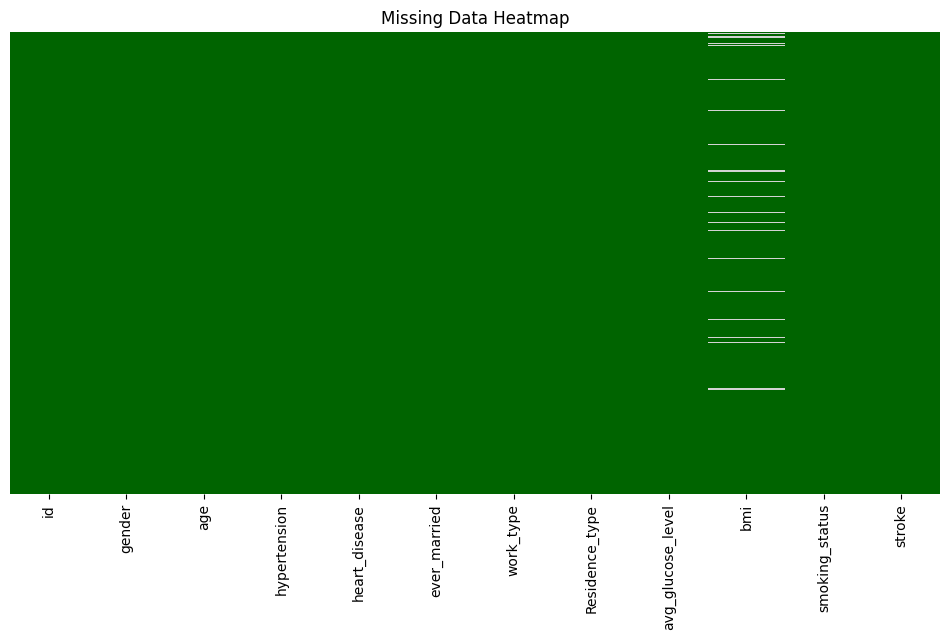

In [7]:
# Plot a Heatmap to before missing values

# Create a custom colormap
colors = ['#006400', '#D3D3D3']
cmap = sns.color_palette(colors, as_cmap=True)
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.heatmap(df.isnull(), cmap=cmap, cbar=False,
            yticklabels=False, xticklabels=df.columns)
plt.title('Missing Data Heatmap')
plt.show()

We have some missing values in our dataset for this this columns{column_names}, it would impact our analysis so we will try to handle the missing values by using Median or Mode

In [8]:
# Handling Missing Values for Numerical and Categorical data
numerical=df.select_dtypes(include=['int64','float64']).columns
categorical=df.select_dtypes(include=['object']).columns

for col in numerical:
  df[col]=df[col].fillna(df[col].median())

for col in categorical:
  df[col]=df[col].fillna(df[col].mode()[0])

df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


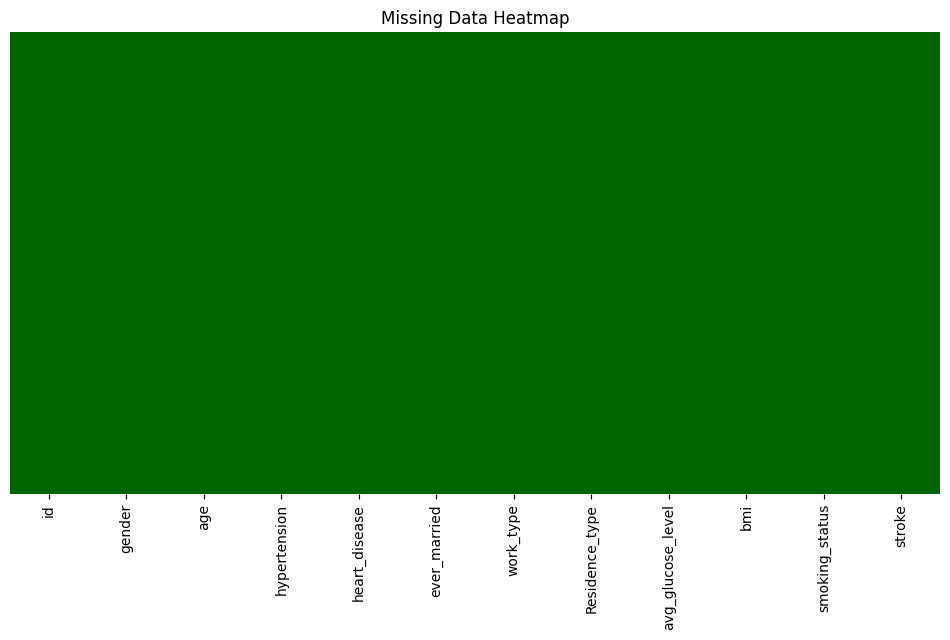

In [9]:
# Plotting a heatmap after imputing missing values
# Create a custom colormap
colors = ['#006400', '#D3D3D3']
cmap = sns.color_palette(colors, as_cmap=True)
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.heatmap(df.isnull(), cmap=cmap, cbar=False,
            yticklabels=False, xticklabels=df.columns)
plt.title('Missing Data Heatmap')
plt.show()

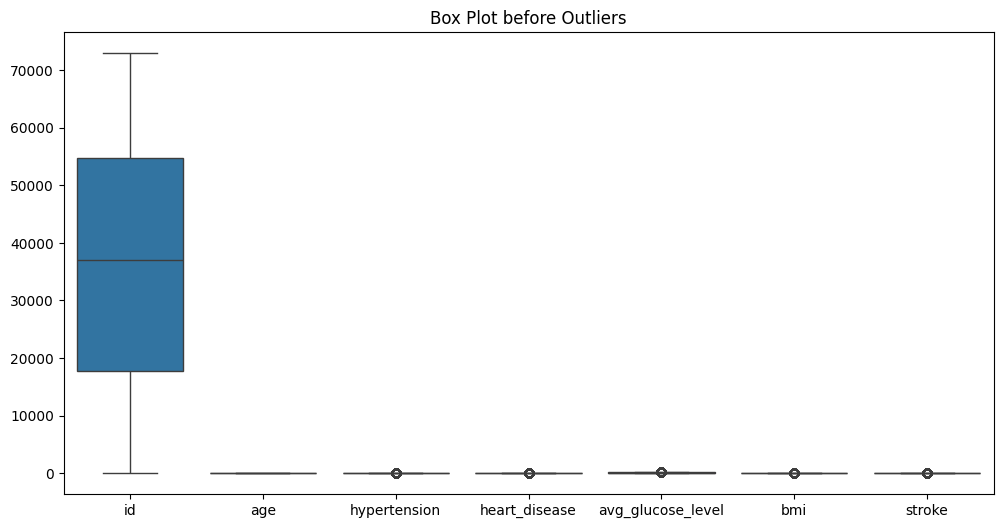


Box Plot after Outliers


Text(0.5, 1.0, 'Box Plot after Outliers')

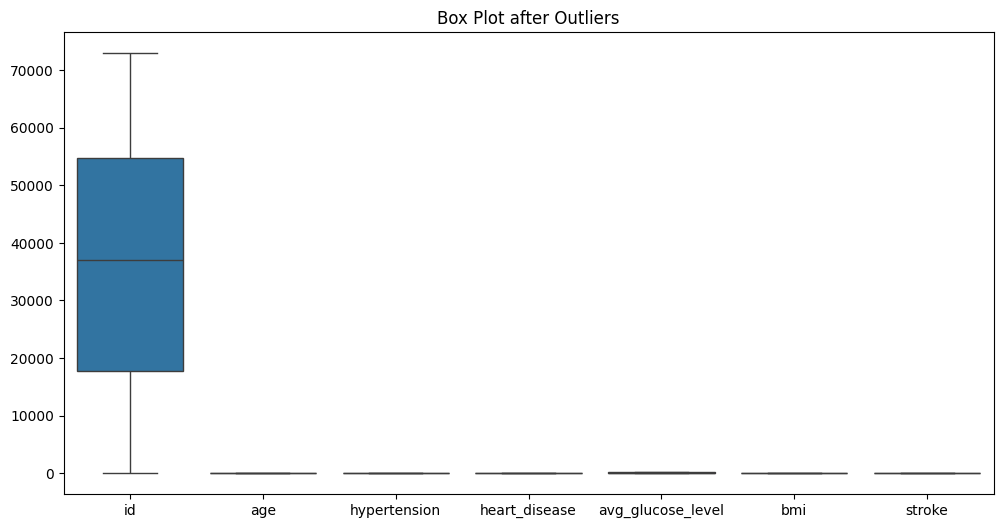

In [10]:
# Handling Outliers

# Box Plot before Outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title('Box Plot before Outliers')
plt.show()

def clip_numerical_outliers(df, column):
    """
    Clips outliers in numerical data using the IQR method.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Clipping the outliers
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

def handle_categorical_outliers(df, column, threshold=0.05):

    freq = df[column].value_counts(normalize=True)
    rare_categories = freq[freq < threshold].index
    df[column] = df[column].replace(rare_categories, 'Other')
    return df

# Assuming 'df' is your DataFrame
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()


# Apply outlier handling
for column in numerical_features:
    df = clip_numerical_outliers(df, column)

for column in categorical_features:
    df = handle_categorical_outliers(df, column)

print("\nBox Plot after Outliers")
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title('Box Plot after Outliers')

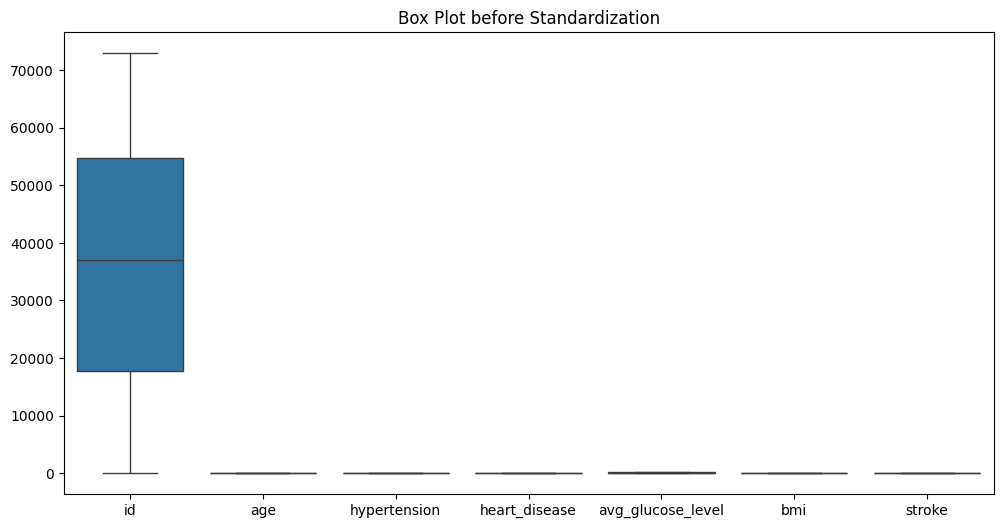


Data after encoding categorical features and combining:
         id  gender       age  hypertension  heart_disease ever_married  \
0 -1.298312    Male  1.051434           0.0            0.0          Yes   
1  0.716371  Female  0.786070           0.0            0.0          Yes   
2 -0.255478    Male  1.626390           0.0            0.0          Yes   
3  1.118363  Female  0.255342           0.0            0.0          Yes   
4 -1.647136  Female  1.582163           0.0            0.0          Yes   

       work_type Residence_type  avg_glucose_level       bmi  ...  \
0        Private          Urban           2.058363  1.110872  ...   
1  Self-employed          Rural           2.058363 -0.082921  ...   
2        Private          Rural           0.148256  0.535043  ...   
3        Private          Urban           2.058363  0.801890  ...   
4  Self-employed          Rural           2.058363 -0.658751  ...   

  gender_Other  ever_married_Yes  work_type_Other  work_type_Private  \
0    

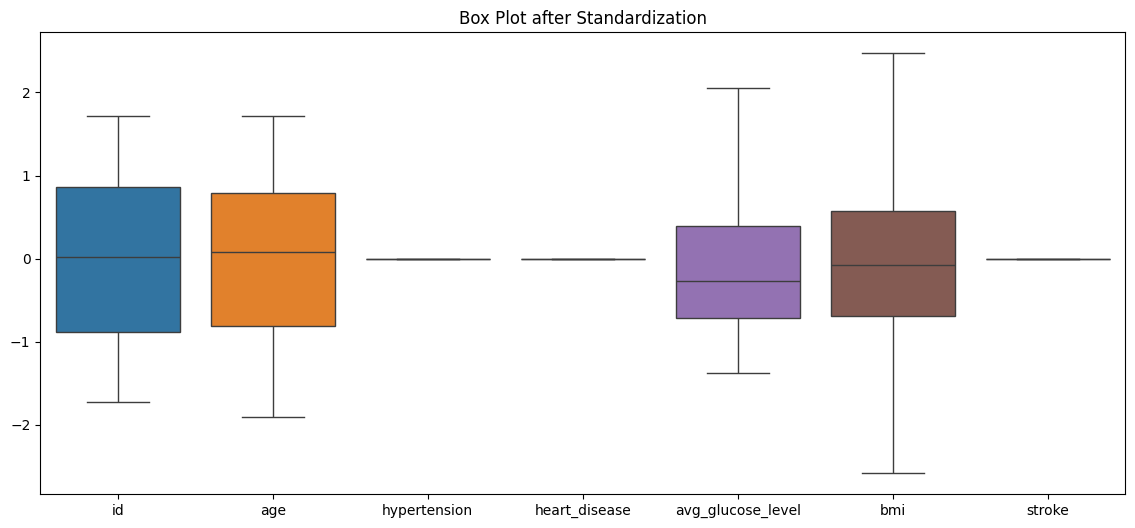

In [11]:
# Box Plot before Standardization
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_features])  # Plot only numerical features
plt.title('Box Plot before Standardization')
plt.show()

# Create a StandardScaler object
scaler = StandardScaler()
# Fit the scaler to your numerical data and transform it
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Using One-Hot Encoding for Categorical Features
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = encoder.fit_transform(df[categorical_features])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

# Combine numerical and encoded categorical features
df = pd.concat([df, encoded_df], axis=1)

print("\nData after encoding categorical features and combining:")
print(df.head())

# Box Plot after Standardization
plt.figure(figsize=(14, 6))
sns.boxplot(data=df[numerical_features])  # Plot only numerical features
plt.title('Box Plot after Standardization')
plt.show()

Statistical Analysis:

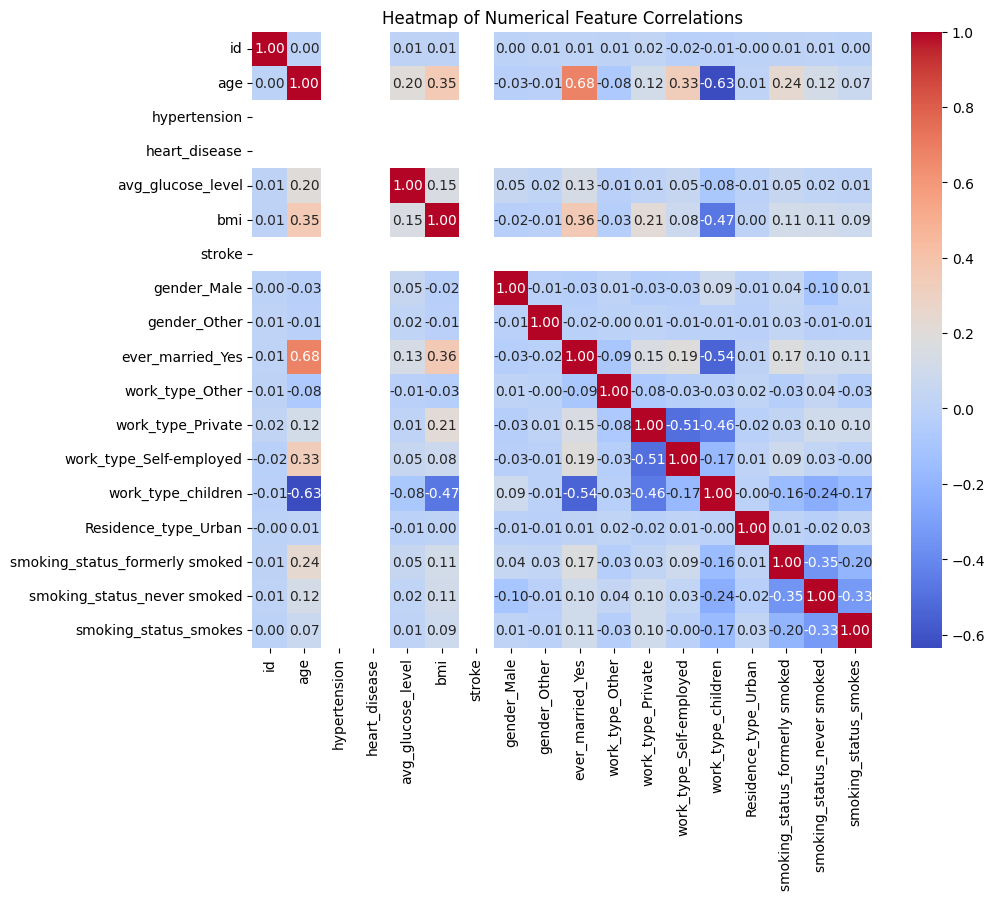

In [23]:
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Numerical Feature Correlations')
plt.show()

Key Predictors: age and avg_glucose_level show strong correlations with stroke

Weak Predictors: Features with low correlation to stroke may be less useful.

Inter-feature Correlation: Highly correlated features (> 0.8) may cause multicollinearity. Consider removing or reducing them.

Machine Learning Methods: Apply and justify appropriate models for stroke prediction.
The following models are selected based on their characteristics:
- Logistic Regression: Suitable for binary classification problems like stroke prediction.
- Random Forest: Handles feature importance and works well with imbalanced datasets.
- K-Nearest Neighbors: Simplicity and flexibility for classification tasks.
- Decision Tree: Provides interpretable results, especially for feature importance.

In [12]:
#Classification Algorithms

predictor_columns = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
                     'gender_Male', 'ever_married_Yes', 'work_type_Private', 'work_type_Self-employed',
                     'Residence_type_Urban', 'smoking_status_formerly smoked', 'smoking_status_never smoked',
                     'smoking_status_smokes']
X = df[predictor_columns]
y = df['stroke']


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=10, random_state=42)
rf_model.fit(X_train, y_train)



RandomForestClassifier(n_estimators=10, random_state=42)

In [13]:
#Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)


In [14]:
# KNN CLASSIFIER

# Create a KNN classifier object
knn_model = KNeighborsClassifier(n_neighbors=3)  # You can adjust n_neighbors

# Set up cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Calculate accuracy scores using cross-validation
accuracy_scores = cross_val_score(knn_model, X, y, cv=kf, scoring='accuracy')

# Print the average accuracy
print(f"KNN Classifier - Average Accuracy: {np.mean(accuracy_scores):.2f}")

# Train the model on the entire dataset (optional)
knn_model.fit(X, y)



KNN Classifier - Average Accuracy: 1.00


KNeighborsClassifier(n_neighbors=3)

In [15]:
# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
models = {"Decision Tree": dt_model, "Random Forest": rf_model,"KNN":knn_model}

for model_name, model in models.items():
    accuracy_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    print(f"{model_name} - Average Accuracy: {np.mean(accuracy_scores):.2f}")

Decision Tree - Average Accuracy: 1.00
Random Forest - Average Accuracy: 1.00
KNN - Average Accuracy: 1.00


:

Evaluation: Use metrics to compare model performance**

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1022

    accuracy                           1.00      1022
   macro avg       1.00      1.00      1.00      1022
weighted avg       1.00      1.00      1.00      1022

Decision Tree Classifier Results:
Accuracy: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1022

    accuracy                           1.00      1022
   macro avg       1.00      1.00      1.00      1022
weighted avg       1.00      1.00      1.00      1022



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


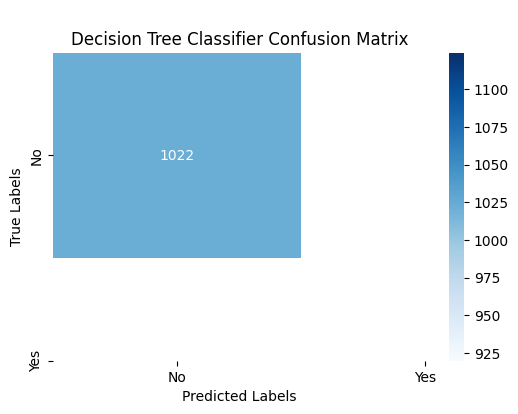

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


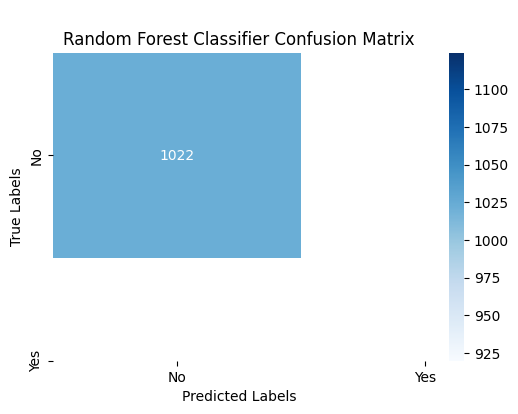

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


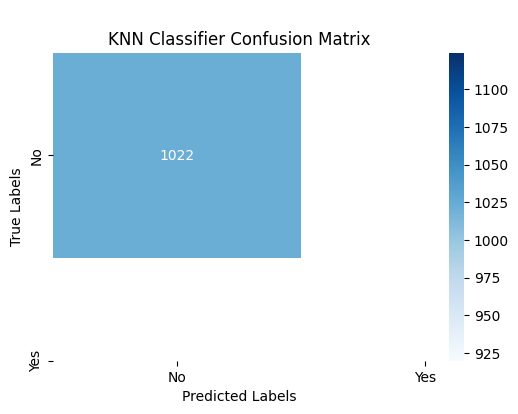

In [16]:
# Generate predictions
rf_predictions = rf_model.predict(X_test)
# Evaluate the Model
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))


print("Decision Tree Classifier Results:")
print("Accuracy:", accuracy_score(y_test, dt_pred))
print(classification_report(y_test, dt_pred))

# Make predictions on new data (optional)
knn_predictions = knn_model.predict(X_test)

# Function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Create a heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])

    # Add labels and title
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(title)

    # Display the plot
    plt.show()

# Example usage with Decision Tree predictions
plot_confusion_matrix(y_test, dt_pred , title="\nDecision Tree Classifier Confusion Matrix")
plot_confusion_matrix(y_test, rf_predictions, title="\nRandom Forest Classifier Confusion Matrix")
plot_confusion_matrix(y_test, knn_predictions, title="\nKNN Classifier Confusion Matrix")

Creativity: Highlight unique aspects of your approach.

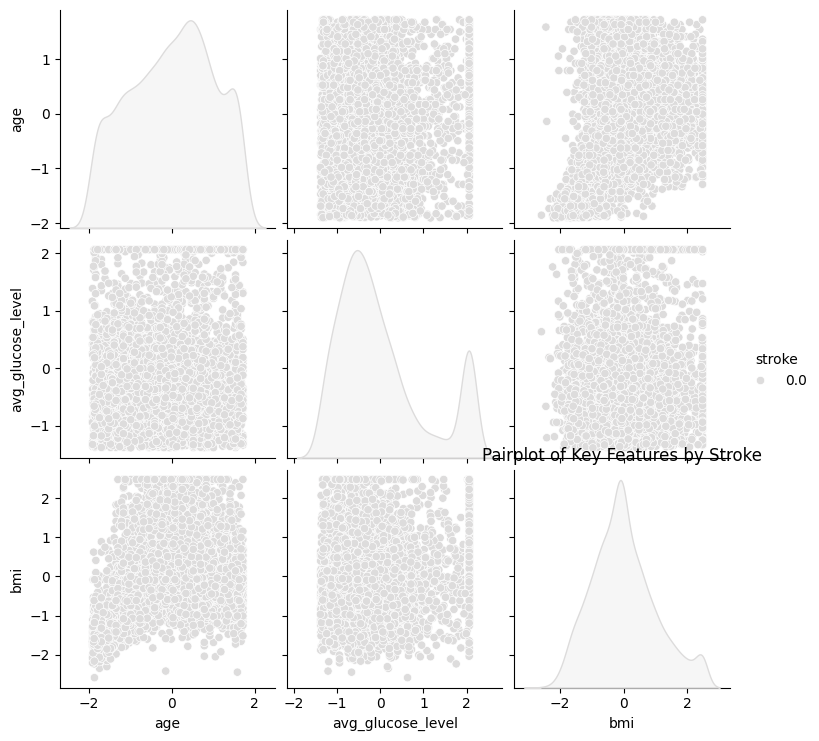

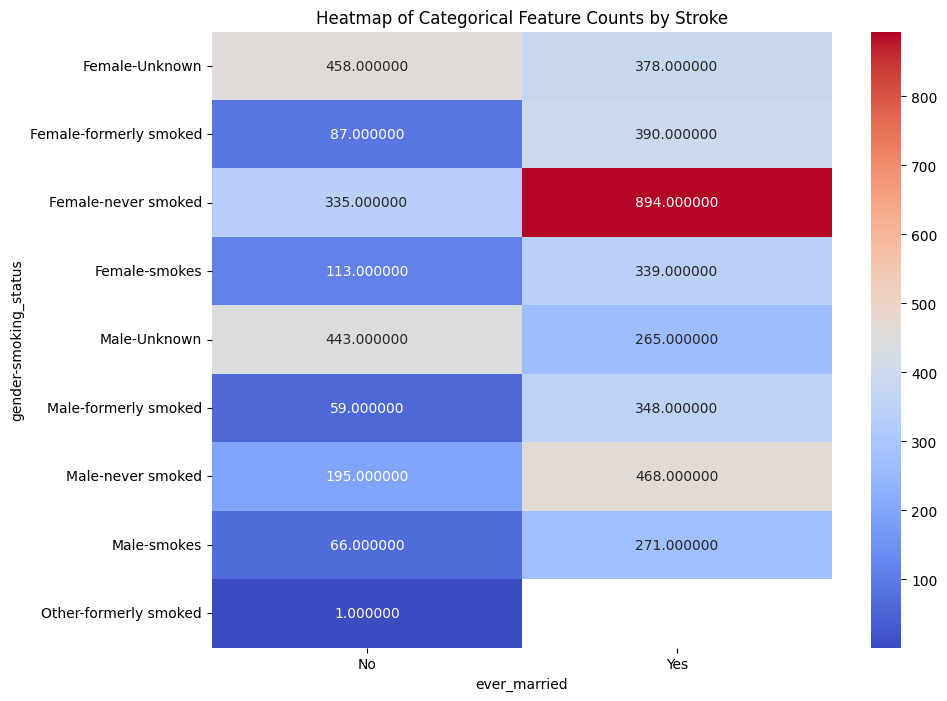

In [24]:
# Visualize relationships between key features and the target variable (stroke).
sns.pairplot(df, vars=['age', 'avg_glucose_level', 'bmi'], hue='stroke', palette='coolwarm')
plt.title('Pairplot of Key Features by Stroke')
plt.show()


#  Heatmap of Categorical Feature Counts:
# Show a heatmap of counts for selected categorical features grouped by stroke.
categorical_combinations = ['gender', 'smoking_status', 'ever_married']
heatmap_data = df.groupby(categorical_combinations)['stroke'].count().unstack()
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt='f', cmap='coolwarm')
plt.title('Heatmap of Categorical Feature Counts by Stroke')
plt.show()